### 作业一

In [1]:
import numpy as np
import matplotlib.pyplot as plt

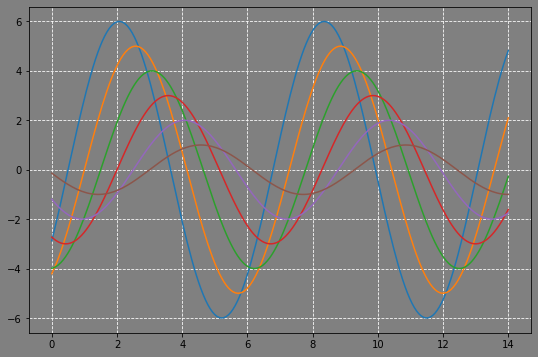

In [7]:
plt.figure(figsize=(9,6),facecolor='gray')

def fun_plot(x):
    for i in range(1,7):
        y = np.sin(x - 0.5*i) * (7 - i)
        plt.plot(x,y)

x = np.linspace(0,14,200)
fun_plot(x)

ax = plt.gca() #获取当前视图
ax.set_facecolor('gray')
plt.grid(color = 'white',linestyle = '--')

### 作业二

In [8]:
import pandas as pd

import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('./PM2.5.xlsx')
display(df.head(10))
df.shape

,城市,年份,月份,日期,小时,季节,PM2.5,露点,湿度,压强,温度,风向,累计风速,降水量,累计降水量
0,北京,2010,1,1,23,冬,129,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0
1,北京,2010,1,2,0,冬,148,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0
2,北京,2010,1,2,1,冬,159,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0
3,北京,2010,1,2,2,冬,181,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0
4,北京,2010,1,2,3,冬,138,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0
5,北京,2010,1,2,4,冬,109,-7.0,85.0,1022.0,-5.0,SE,6.25,0.0,0.0
6,北京,2010,1,2,5,冬,105,-7.0,92.0,1022.0,-6.0,SE,7.14,0.0,0.0
7,北京,2010,1,2,6,冬,124,-7.0,92.0,1023.0,-6.0,SE,8.93,0.0,0.0
8,北京,2010,1,2,7,冬,120,-7.0,85.0,1024.0,-5.0,SE,10.72,0.0,0.0
9,北京,2010,1,2,8,冬,132,-8.0,85.0,1024.0,-6.0,SE,12.51,0.0,0.0


(161630, 15)

In [21]:
df2 = df.groupby(by = ['城市','季节'])[['PM2.5']].mean().round(2)
df2

PM2.5
城市 季节        
上海 冬    75.96
   夏    33.10
   春    55.70
   秋    46.30
北京 冬   114.00
   夏    84.03
   春    85.46
   秋   100.12
广州 冬    66.52
   夏    33.38
   春    54.01
   秋    51.14
成都 冬   128.60
   夏    56.78
   春    78.37
   秋    75.40
沈阳 冬   109.61
   夏    45.29
   春    64.03
   秋    78.73

In [22]:
# 数据重塑
df2 = df2.unstack(level = -1)
df2

PM2.5                      
季节       冬      夏      春       秋
城市                              
上海   75.96  33.10  55.70   46.30
北京  114.00  84.03  85.46  100.12
广州   66.52  33.38  54.01   51.14
成都  128.60  56.78  78.37   75.40
沈阳  109.61  45.29  64.03   78.73

In [23]:
df2.columns = df2.columns.droplevel(level=0)
df2

季节,冬,夏,春,秋
城市,,,,
上海,75.96,33.10,55.70,46.30
北京,114.00,84.03,85.46,100.12
广州,66.52,33.38,54.01,51.14
成都,128.60,56.78,78.37,75.40
沈阳,109.61,45.29,64.03,78.73


In [26]:
df2 = df2[list('春夏秋冬')]
df2 = df2.loc[['北京','上海','广州','成都','沈阳']]
df2

季节,春,夏,秋,冬
城市,,,,
北京,85.46,84.03,100.12,114.00
上海,55.70,33.10,46.30,75.96
广州,54.01,33.38,51.14,66.52
成都,78.37,56.78,75.40,128.60
沈阳,64.03,45.29,78.73,109.61


In [28]:
plt.rcParams['font.family'] = 'STKaiti'
plt.rcParams['font.size'] = 18

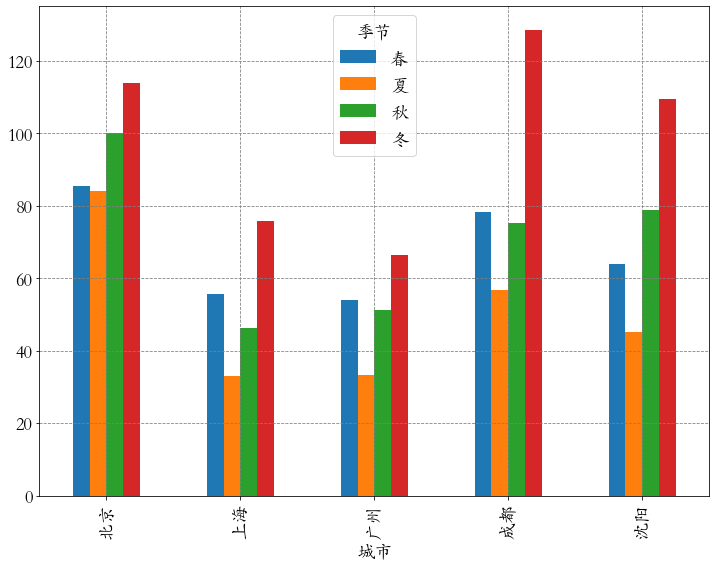

In [36]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
df2.plot.bar(ax = ax)
plt.grid(color = 'gray',ls = '--')